In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# mount google drive folder as possible module path
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/York/numeric_methods/green book/notebooks/modules')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Jacobi Method

https://en.wikipedia.org/wiki/Jacobi_method_for_complex_Hermitian_matrices

This function computes all eigenvalues λ i and eigenvectors x i of a symmetric, n × n
matrix A by the Jacobi method. The algorithm works exclusively with the upper tri-
angular part of A, which is destroyed in the process. The principal diagonal of A is re-
placed by the eigenvalues, and the columns of the transformation matrix P become
the normalized eigenvectors.

In [ ]:
## module jacobi
''' lam,x = jacobi(a,tol = 1.0e-8).
    Solution of std. eigenvalue problem [a]{x} = lam{x}
    by Jacobi's method. Returns eigenvalues in vector {lam}
    and the eigenvectors as columns of matrix [x].
'''
import numpy as np
import math

def jacobi(a,tol = 1.0e-8): # Jacobi method

    def threshold(a):
        sum = 0.0
        for i in range(n-1):
            for j in range (i+1,n):
                sum = sum + abs(a[i,j])
        return 0.5*sum/n/(n-1)

    def rotate(a,p,k,l): # Rotate to make a[k,l] = 0
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1.0e-36: t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + math.sqrt(phi**2 + 1.0))
            if phi < 0.0: t = -t
        c = 1.0/math.sqrt(t**2 + 1.0); s = t*c
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        for i in range(k):      # Case of i < k
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(k+1,l):  # Case of k < i < l
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n):  # Case of i > l
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n):      # Update transformation matrix
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l])
        
    n = len(a)        
    p = np.identity(n,float)
    for k in range(20):
        mu = threshold(a)       # Compute new threshold
        for i in range(n-1):    # Sweep through matrix
            for j in range(i+1,n):   
                if abs(a[i,j]) >= mu:
                    rotate(a,p,i,j)
        if mu <= tol: return np.diagonal(a),p
    print('Jacobi method did not converge')
        


sortJacobi

The eigenvalues/eigenvectors returned by jacobi are not ordered. The function
listed next can be used to sort the eigenvalues and eigenvectors into ascending or-
der of eigenvalues.

In [ ]:
## module sortJacobi
''' sortJacobi(lam,x).
    Sorts the eigenvalues {lam} and eigenvectors [x]
    in order of ascending eigenvalues.
'''    
import swap

def sortJacobi(lam,x):
    n = len(lam)
    for i in range(n-1):
        index = i
        val = lam[i]
        for j in range(i+1,n):
            if lam[j] < val:
                index = j
                val = lam[j]
        if index != i:
            swap.swapRows(lam,i,index)
            swap.swapCols(x,i,index)


stdForm

Given the matrices A and B, the function stdForm returns H and the transformation
matrix T = (L −1 ) T . The inversion of L is carried out by invert (the triangular shape
of L allows this to be done by back substitution). Note that original A, B, and L are
destroyed.

In [ ]:
## module stdForm
''' h,t = stdForm(a,b).
    Transforms the eigenvalue problem [a]{x} = lam[b]{x}
    to the standard form [h]{z} = lam{z}. The eigenvectors
    are related by {x} = [t]{z}.
'''    
import numpy as np
from choleski import *

def stdForm(a,b):

    def invert(L): # Inverts lower triangular matrix L
        n = len(L)
        for j in range(n-1):
            L[j,j] = 1.0/L[j,j]
            for i in range(j+1,n):
                L[i,j] = -np.dot(L[i,j:i],L[j:i,j])/L[i,i]
        L[n-1,n-1] = 1.0/L[n-1,n-1]

    n = len(a)
    L = choleski(b)          
    invert(L)
    h = np.dot(b,np.inner(a,L))
    return h,np.transpose(L)

Example

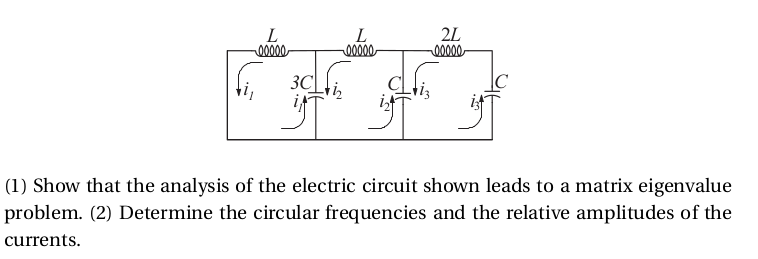

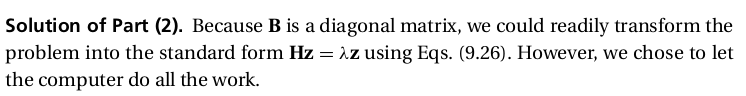

In [ ]:
A = np.array([[ 1/3, -1/3, 0.0], [-1/3, 4/3, -1.0], [ 0.0, -1.0, 2.0]])
A.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [ ]:
#Stoped Here!!!!!
# Not Work
# Solution
A = np.array([[ 1/3, -1/3, 0.0], [-1/3, 4/3, -1.0], [ 0.0, -1.0, 2.0]])
B = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 2.0]])

H,T = stdForm(A,B)
# Transform into std. form
lam,Z = jacobi(H) # Z = eigenvecs. of H
X = np.dot(T,Z) # Eigenvecs. of original problem
sortJacobi(lam, X) # Arrange in ascending order of eigenvecs.
for i in range(3): # Normalize eigenvecs.
    X[:,i] = X[:,i]/math.sqrt(np.dot(X[:,i],X[:,i]))
print("Eigenvalues:", lam)
print("Eigenvectors:", X)

Eigenvalues: [0.1477883  0.58235144 1.93652692]
Eigenvectors: [[ 0.84021782 -0.65122529 -0.18040571]
 [ 0.46769473  0.48650067  0.86767582]
 [ 0.27440056  0.58242829 -0.46324126]]


# Power and Inverse Power Methods

inversePower

Given the matrix A and the shift s, the function inversePower returns the eigen-
value of A closest to s and the corresponding eigenvector. The matrix A ∗ = A − sI is
decomposed as soon as it is formed, so that only the solution phase (forward and
back substitution) is needed in the iterative loop. If A is banded, the efficiency of the
program could be improved by replacing LUdecomp and LUsolve by functions that
specialize in banded matrices (e.g., LUdecomp5 and LUsolve5 )—see Example 9.6.
The program line that forms A ∗ must also be modified to be compatible with the stor-
age scheme used for A.

In [ ]:
## module inversePower
''' lam,x = inversePower(a,s,tol=1.0e-6).
    Inverse power method for solving the eigenvalue problem
    [a]{x} = lam{x}. Returns 'lam' closest to 's' and the
    corresponding eigenvector {x}.
'''
import numpy as np
from LUdecomp import *
import math
from random import random
def inversePower(a,s,tol=1.0e-6):
    n = len(a)
    aStar = a - np.identity(n)*s  # Form [a*] = [a] - s[I]
    aStar = LUdecomp(aStar)       # Decompose [a*]
    x = np.zeros(n)
    for i in range(n):            # Seed [x] with random numbers
        x[i] = random()
    xMag = math.sqrt(np.dot(x,x)) # Normalize [x]
    x =x/xMag
    for i in range(50):           # Begin iterations      
        xOld = x.copy()           # Save current [x]
        x = LUsolve(aStar,x)      # Solve [a*][x] = [xOld]
        xMag = math.sqrt(np.dot(x,x)) # Normalize [x]
        x = x/xMag
        if np.dot(xOld,x) < 0.0:  # Detect change in sign of [x]
            sign = -1.0
            x = -x
        else: sign = 1.0
        if math.sqrt(np.dot(xOld - x,xOld - x)) < tol:
            return s + sign/xMag,x
    print('Inverse power method did not converge')


Example

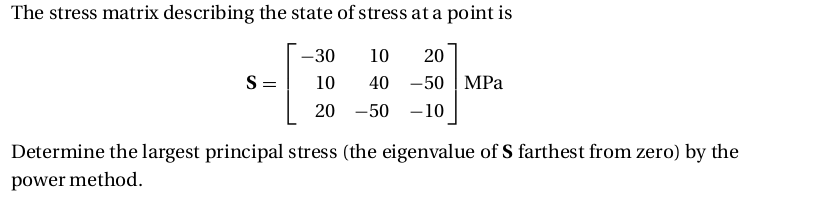

In [ ]:
# Solution
s = np.array([[-30.0, 10.0, 20.0], [ 10.0, 40.0, -50.0], [ 20.0, -50.0, -10.0]])
v = np.array([1.0, 0.0, 0.0])
for i in range(100):
    vOld = v.copy()
    z = np.dot(s,v)
    zMag = math.sqrt(np.dot(z,z))
    v = z/zMag
    if np.dot(vOld,v) < 0.0:
        sign = -1.0
        v = -v
    else: sign = 1.0
    if math.sqrt(np.dot(vOld - v,vOld - v)) < 1.0e-6: break
lam = sign*zMag
print("Number of iterations =",i)
print("Eigenvalue =",lam)

Number of iterations = 92
Eigenvalue = 70.94348330679053


Example

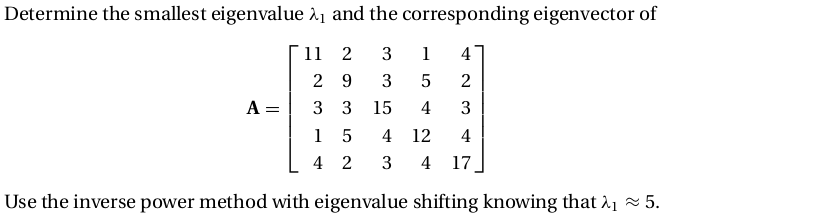

In [ ]:
s = 5.0

a = np.array([[ 11.0, 2.0, 3.0, 1.0, 4.0],[ 2.0, 9.0, 3.0, 5.0, 2.0], [ 3.0, 3.0, 15.0, 4.0, 3.0], [ 1.0, 5.0, 4.0, 12.0, 4.0], [ 4.0, 2.0, 3.0, 4.0, 17.0]])
lam,x = inversePower(a,s)
print("Eigenvalue =",lam)
print("Eigenvector:",x)

Eigenvalue = 4.8739463786492
Eigenvector: [-0.26726602  0.74142854  0.05017271 -0.59491453  0.14970633]


In [ ]:
## module inversePower5
''' lam,x = inversePower5(Bv,d,e,f,tol=1.0e-6).
    Inverse power method for solving the eigenvalue problem
    [A]{x} = lam[B]{x}, where [A] is pentadiagonal and [B]
    is sparse. User must supply the function Bv(v) that
    returns the vector [B]{v}.
'''
import numpy as np
from LUdecomp5 import *
import math
from numpy.random import rand

def inversePower5(Bv,d,e,f,tol=1.0e-6):  
    n = len(d)
    d,e,f = LUdecomp5(d,e,f)
    x = rand(n)                     # Seed x with random numbers
    xMag = math.sqrt(np.dot(x,x))   # Normalize {x}
    x = x/xMag
    for i in range(30):             # Begin iterations
        xOld = x.copy()             # Save current {x}
        x = Bv(xOld)                # Compute [B]{x}
        x = LUsolve5(d,e,f,x)       # Solve [A]{z} = [B]{x}
        xMag = math.sqrt(np.dot(x,x))  # Normalize {z}
        x = x/xMag
        if np.dot(xOld,x) < 0.0:    # Detect change in sign of {x}
            sign = -1.0
            x = -x
        else: sign = 1.0
        if math.sqrt(np.dot(xOld - x,xOld - x)) < tol:
            return sign/xMag,x
    print('Inverse power method did not converge')


In [ ]:
def Bv(v):
    # Compute {z} = [B]{v}
    n = len(v)
    z = np.zeros(n)
    z[0] = 2.0*v[0] - v[1]
    for i in range(1,n-1):
        z[i] = -v[i-1] + 2.0*v[i] - v[i+1]
    z[n-1] = -v[n-2] + 2.0*v[n-1]
    return z


n = 100 # Number of interior nodes
d = np.ones(n)*6.0 # Specify diagonals of [A] = [f\e\d\e\f]
d[0] = 5.0
d[n-1] = 7.0
e = np.ones(n-1)*(-4.0)
f = np.ones(n-2)*1.0
lam,x = inversePower5(Bv,d,e,f)
print("PLˆ2/EI =",lam*(n+1)**2)

PLˆ2/EI = 20.186735498083998


# Householder Reduction to Tridiagonal Form

householder

The function householder in this module does reduction to tridiagonal form. It
returns (d, c), where d and c are vectors that contain the elements of the princi-
pal diagonal and the subdiagonal, respectively. Only the upper triangular portion is educed to the triangular form. The part below the principal diagonal is used to store
the vectors u. This is done automatically by the statement u = a[k+1:n,k], which
does not create a new object u , but simply sets up a reference to a[k+1:n,k] (makes
a deep copy). Thus any changes made to u are reflected in a[k+1:n,k] .

In [ ]:
## module householder
''' d,c = householder(a).
    Householder similarity transformation of matrix [a] to 
    tridiagonal form].

    p = computeP(a).
    Computes the acccumulated transformation matrix [p]
    after calling householder(a).
'''    
import numpy as np
import math

def householder(a): 
    n = len(a)
    for k in range(n-2):
        u = a[k+1:n,k]
        uMag = math.sqrt(np.dot(u,u))
        if u[0] < 0.0: uMag = -uMag
        u[0] = u[0] + uMag
        h = np.dot(u,u)/2.0
        v = np.dot(a[k+1:n,k+1:n],u)/h
        g = np.dot(u,v)/(2.0*h)
        v = v - g*u
        a[k+1:n,k+1:n] = a[k+1:n,k+1:n] - np.outer(v,u) \
                         - np.outer(u,v)
        a[k,k+1] = -uMag
    return np.diagonal(a),np.diagonal(a,1)

def computeP(a): 
    n = len(a)
    p = np.identity(n)*1.0
    for k in range(n-2):
        u = a[k+1:n,k]
        h = np.dot(u,u)/2.0
        v = np.dot(p[1:n,k+1:n],u)/h           
        p[1:n,k+1:n] = p[1:n,k+1:n] - np.outer(v,u)
    return p
      

Example

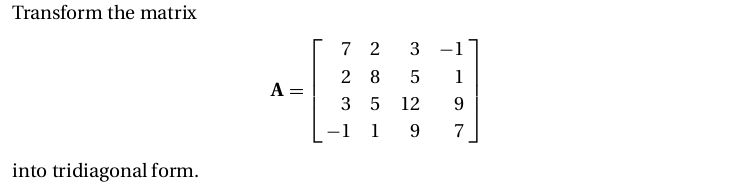

In [ ]:
# Solution
a = np.array([[ 7.0, 2.0, 3.0, -1.0], \
[ 2.0, 8.0, 5.0, 1.0], \
[ 3.0, 5.0, 12.0, 9.0], \
[-1.0, 1.0, 9.0, 7.0]])


d,c = householder(a)
print("Principal diagonal {d}:", d)
print("\nSubdiagonal {c}:\n",c)
print("\nTransformation matrix [P]:")
print(computeP(a))

Principal diagonal {d}: [ 7.         10.64285714 10.59421525  5.76292761]

Subdiagonal {c}:
 [-3.74165739  9.13085149  4.77158058]

Transformation matrix [P]:
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.53452248 -0.25506831  0.80574554]
 [ 0.         -0.80178373 -0.14844139 -0.57888514]
 [ 0.          0.26726124 -0.95546079 -0.12516436]]


# Eigenvalues of Symmetric Tridiagonal Matrices

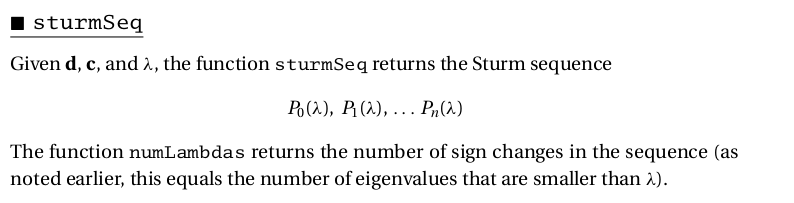

In [ ]:
## module sturmSeq
''' p = sturmSeq(c,d,lam).
    Returns the Sturm sequence {p[0],p[1],...,p[n]}
    associated with the characteristic polynomial
    |[A] - lam[I]| = 0, where [A] is a n x n
    tridiagonal matrix.

    numLam = numLambdas(p).
    Returns the number of eigenvalues of a tridiagonal
    matrix that are smaller than 'lam'.
    Uses the Sturm sequence {p} obtained from 'sturmSeq'.
'''
import numpy as np

def sturmSeq(d,c,lam):
    n = len(d) + 1
    p = np.ones(n)
    p[1] = d[0] - lam
    for i in range(2,n):
        p[i] = (d[i-1] - lam)*p[i-1] - (c[i-2]**2)*p[i-2]
    return p

def numLambdas(p):
    n = len(p)
    signOld = 1
    numLam = 0
    for i in range(1,n):
        if p[i] > 0.0: sign = 1
        elif p[i] < 0.0: sign = -1
        else: sign = -signOld
        if sign*signOld < 0: numLam = numLam + 1
        signOld = sign
    return numLam


gerschgorin

The function gerschgorin returns the lower and upper global bounds on the eigen-
values of a symmetric tridiagonal matrix A = [c\d\c].

In [ ]:
## module gerschgorin
''' lamMin,lamMax = gerschgorin(d,c).
    Applies Gerschgorin's theorem to find the global bounds on
    the eigenvalues of a symmetric tridiagonal matrix.
'''
def gerschgorin(d,c):
    n = len(d)
    lamMin = d[0] - abs(c[0])
    lamMax = d[0] + abs(c[0])
    for i in range(1,n-1):
        lam = d[i] - abs(c[i]) - abs(c[i-1])
        if lam < lamMin: lamMin = lam
        lam = d[i] + abs(c[i]) + abs(c[i-1])
        if lam > lamMax: lamMax = lam
    lam = d[n-1] - abs(c[n-2])
    if lam < lamMin: lamMin = lam
    lam = d[n-1] + abs(c[n-2])
    if lam > lamMax: lamMax = lam
    return lamMin,lamMax


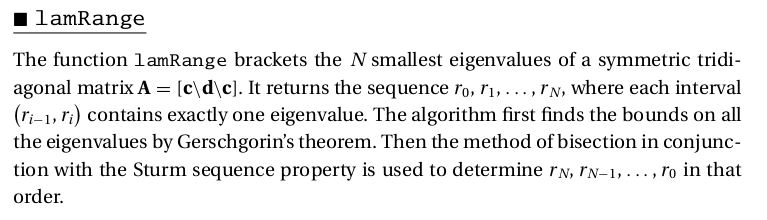

In [ ]:
## module lamRange
''' r = lamRange(d,c,N).
    Returns the sequence {r[0],r[1],...,r[N]} that
    separates the N lowest eigenvalues of the tridiagonal
    matrix; that is, r[i] < lam[i] < r[i+1].
'''
import numpy as np
from sturmSeq import *
from gerschgorin import *

def lamRange(d,c,N):
    lamMin,lamMax = gerschgorin(d,c)
    r = np.ones(N+1)
    r[0] = lamMin
  # Search for eigenvalues in descending order  
    for k in range(N,0,-1):
      # First bisection of interval(lamMin,lamMax)
        lam = (lamMax + lamMin)/2.0
        h = (lamMax - lamMin)/2.0
        for i in range(1000):
          # Find number of eigenvalues less than lam
            p = sturmSeq(d,c,lam)
            numLam = numLambdas(p)
          # Bisect again & find the half containing lam 
            h = h/2.0
            if numLam < k: lam = lam + h
            elif numLam > k: lam = lam - h
            else: break
      # If eigenvalue located, change the upper limit
      # of search and record it in [r]
        lamMax = lam
        r[k] = lam
    return r


eigenvals3

The function eigenvals3 computes N smallest eigenvalues of a symmetric tridiag-
onal matrix with the method of Ridder.

In [ ]:
## module eigenvals3
''' lam = eigenvals3(d,c,N).
    Returns the N smallest eigenvalues of a symmetric
    tridiagonal matrix defined by its diagonals d and c.
'''    
from lamRange import *
from ridder import *
from sturmSeq import sturmSeq
from numpy import zeros

def eigenvals3(d,c,N):

    def f(x):             # f(x) = |[A] - x[I]|
        p = sturmSeq(d,c,x)
        return p[len(p)-1]

    lam = zeros(N)
    r = lamRange(d,c,N)   # Bracket eigenvalues
    for i in range(N):    # Solve by Brent's method
        lam[i] = ridder(f,r[i],r[i+1])
    return lam   



Example

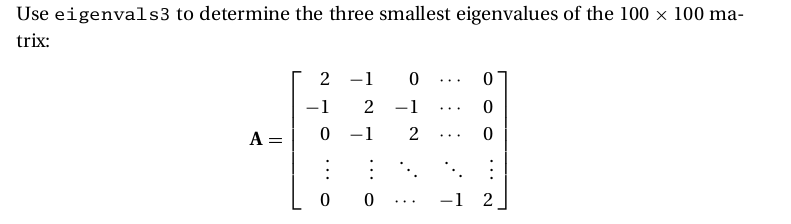

In [ ]:
N = 3
n = 100
d = np.ones(n)*2.0
c = np.ones(n-1)*(-1.0)
lambdas = eigenvals3(d,c,N)
print(lambdas)

[0.00096744 0.00386881 0.0087013 ]


In [ ]:
## module inversePower3
''' lam,x = inversePower3(d,c,s,tol=1.0e-6)
    Inverse power method applied to a symmetric tridiagonal
    matrix. Returns the eigenvalue closest to s
    and the corresponding eigenvector.
'''
from LUdecomp3 import *
import math
import numpy as np
from numpy.random import rand

def inversePower3(d,c,s,tol=1.0e-6):
    n = len(d)
    e = c.copy()
    cc = c.copy()
    dStar = d - s                  # Form [A*] = [A] - s[I]
    LUdecomp3(cc,dStar,e)          # Decompose [A*]
    x = rand(n)                    # Seed x with random numbers
    xMag = math.sqrt(np.dot(x,x))  # Normalize [x]
    x = x/xMag
    
    for i in range(30):               # Begin iterations    
        xOld = x.copy()               # Save current [x]
        LUsolve3(cc,dStar,e,x)        # Solve [A*][x] = [xOld]
        xMag = math.sqrt(np.dot(x,x)) # Normalize [x]
        x = x/xMag
        if np.dot(xOld,x) < 0.0:   # Detect change in sign of [x]
            sign = -1.0
            x = -x
        else: sign = 1.0
        if math.sqrt(np.dot(xOld - x,xOld - x)) < tol:
            return s + sign/xMag,x
    print('Inverse power method did not converge')
    return


Example

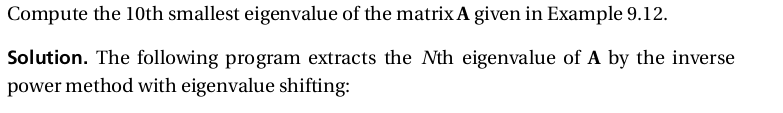

In [ ]:
N = 3
# Number of eigenvalues requested
a = np.array([[ 11.0, 2.0, 3.0, 1.0, 4.0],[ 2.0, 9.0, 3.0, 5.0, 2.0], [ 3.0, 3.0, 15.0, 4.0, 3.0], [ 1.0, 5.0, 4.0, 12.0, 4.0], [ 4.0, 2.0, 3.0, 4.0, 17.0]])

xx = np.zeros((len(a),N))
d,c = householder(a) # Tridiagonalize [A]
p = computeP(a) # Compute transformation matrix
lambdas = eigenvals3(d,c,N) # Compute eigenvalues
for i in range(N):
    s = lambdas[i]*1.0000001 # Shift very close to eigenvalue
    lam,x = inversePower3(d,c,s) # Compute eigenvector [x]
    xx[:,i] = x
xx = np.dot(p,xx)

print("Eigenvalues:\n",lambdas)
print("\nEigenvectors:\n",xx)

Eigenvalues:
 [ 4.87394638  8.66356791 10.93677451]

Eigenvectors:
 [[ 0.26726603 -0.72910002  0.50579164]
 [-0.74142854 -0.41391448 -0.31882387]
 [-0.05017271  0.4298639   0.52077788]
 [ 0.59491453 -0.06955611 -0.60290543]
 [-0.14970633  0.32782151 -0.08843985]]
